In [433]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import numpy as np
import seaborn

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [463]:
df = pd.read_csv('dataset/data.csv', index_col = 0)
data = np.array(df)
n,d = data.shape

n,d

(569, 32)

In [464]:
# Création d'une "dummy variable" pour diagnosis

for i in range(n):
    if data[i,0] == 'M':
        data[i,0] = 1.0
    else:
        data[i,0] = 0.0

data

array([[1.0, 17.99, 10.38, ..., 0.4601, 0.1189, nan],
       [1.0, 20.57, 17.77, ..., 0.275, 0.08902, nan],
       [1.0, 19.69, 21.25, ..., 0.3613, 0.08758, nan],
       ...,
       [1.0, 16.6, 28.08, ..., 0.2218, 0.0782, nan],
       [1.0, 20.6, 29.33, ..., 0.4087, 0.124, nan],
       [0.0, 7.76, 24.54, ..., 0.2871, 0.07039, nan]], dtype=object)

In [437]:
# Ajout des modifications sur le Dataframe

df["diagnosis"] = np.array(data[:,0],dtype=float)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,1.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,1.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


# Question 1

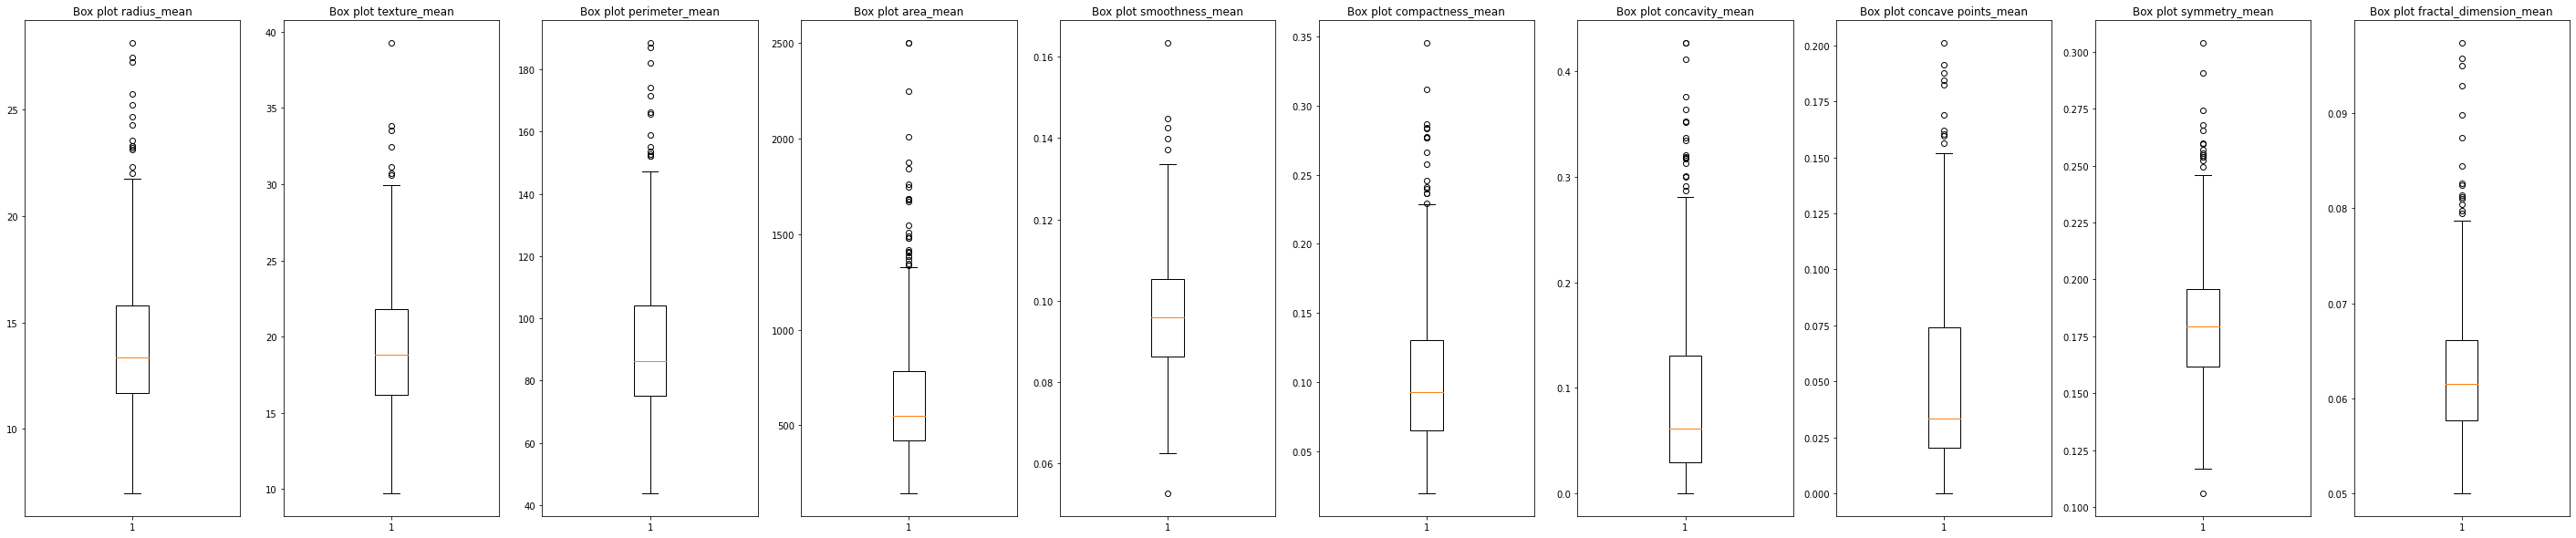

In [438]:
fig = plt.figure(figsize=(50,10))
# On visualise à partir de radius_mean
for i in range(1,11):
    ax = fig.add_subplot(1,10,i)
    ax.set_title("Box plot " + df.columns[i])
    plt.boxplot(data[:,i])

Les variances et moyennes des attributs peuvent être très variables, il est nécessaire de normaliser et de recentrer les données avant de créer un modèle de classification. 

# Question 2

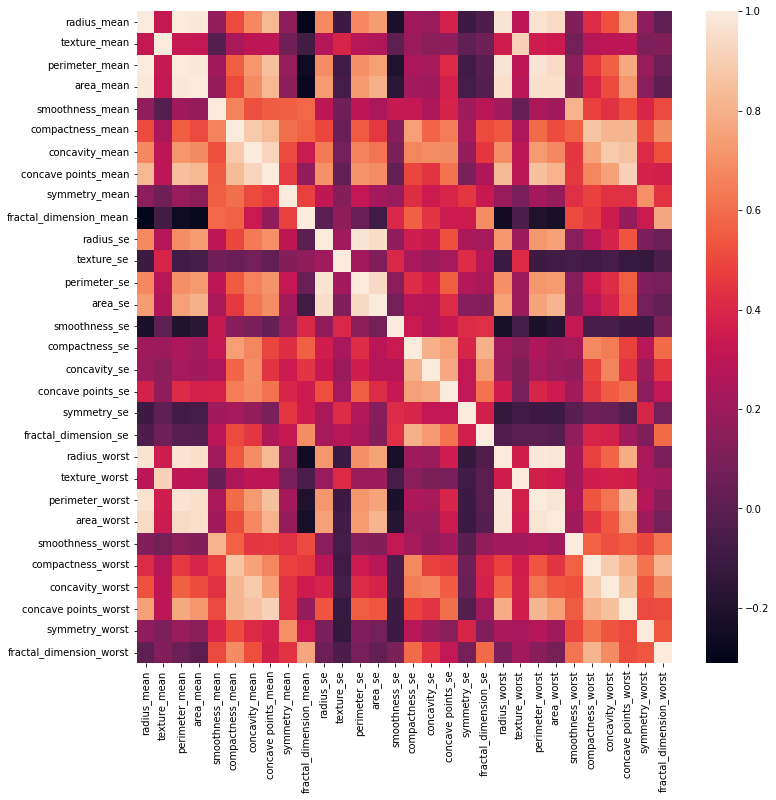

In [465]:
fig = plt.figure(figsize=(12,12))

# On ne prend pas en ocmpte la dernière colonne comprise de NaN
seaborn.heatmap(df.iloc[: , 0:31].corr())
plt.show()

# Question 3

On observe des corrélations diverses entre les différents attributs, en particulier avec diagnosis, que l'on souhaite prédire. Ce ne sont donc pas des paramètres indépendants du problème ce qui rend la résolution complexe, étant donné u'ils sont nombreux. Il est donc nécessaire de procéder par réduction de dimension pour diminuer le nombre d'attributs.

# Question 4

In [466]:
# Normalisation et centrage des données

donnee_norm = data[:,1:31].transpose().copy().astype(float)
for i in range(0,len(donnee_norm)):
    att = donnee_norm[i]
    moy =  np.mean(att)
    var = np.var(att)
    donnee_norm[i] -= moy
    donnee_norm[i] /= np.sqrt(var)

donnee_norm

array([[ 1.09706398,  1.82982061,  1.57988811, ...,  0.70228425,
         1.83834103, -1.80840125],
       [-2.07333501, -0.35363241,  0.45618695, ...,  2.0455738 ,
         2.33645719,  1.22179204],
       [ 1.26993369,  1.68595471,  1.56650313, ...,  0.67267578,
         1.98252415, -1.81438851],
       ...,
       [ 2.29607613,  1.0870843 ,  1.95500035, ...,  0.41406869,
         2.28998549, -1.74506282],
       [ 2.75062224, -0.24388967,  1.152255  , ..., -1.10454895,
         1.91908301, -0.04813821],
       [ 1.93701461,  0.28118999,  0.20139121, ..., -0.31840916,
         2.21963528, -0.75120669]])

In [467]:
# Création de A

dTilde = 3
Sigma = np.cov(donnee_norm)
valp, vecp = np.linalg.eig(Sigma)

# On crée un couple afin d'ordonner les vecteurs propres de la même facon que les valeurs propres
couple = zip(valp, vecp)
vecp = [x for _, x in sorted(couple)]
valp.sort()
valp = np.flip(valp)
vecp = np.flip(vecp)

A = np.zeros((30,dTilde))
for i in range(dTilde):
    A[:,i] = vecp[i].transpose()

In [468]:
valp[0:3]

array([13.30499079,  5.7013746 ,  2.82291016])

In [469]:
A

array([[ 6.85700057e-02, -4.48369467e-01,  6.97690429e-02],
       [-4.96986642e-02, -2.44134993e-01, -1.76650122e-02],
       [-7.29289034e-02, -9.48006326e-02, -7.51604777e-02],
       [ 9.85526942e-02,  5.54997454e-04,  4.02447050e-02],
       [-1.82579441e-01,  9.87867898e-02, -1.16648876e-01],
       [ 1.92264989e-02, -8.47459309e-02, -2.70154137e-02],
       [ 1.29476396e-01,  2.45566636e-02,  1.25255946e-01],
       [-1.31526670e-01, -1.73573093e-02, -1.15415423e-01],
       [-2.11194013e-01,  6.58114593e-05, -8.43382663e-02],
       [ 2.11460455e-01, -1.05339342e-02,  3.83826098e-01],
       [-7.02414091e-01, -2.73661018e-04,  6.89896968e-01],
       [-2.25384659e-01, -2.97886446e-02, -2.39595276e-01],
       [ 1.46712338e-01, -4.11029851e-02,  1.58317455e-01],
       [ 2.02924255e-01, -3.87061187e-02,  1.94821310e-01],
       [-1.50583883e-01, -1.57841960e-01, -1.14453955e-01],
       [ 5.11187749e-02,  1.07922421e-01,  3.99029358e-02],
       [-5.95061348e-02,  2.15600995e-02

In [471]:
donnees_ACP = np.dot(A.transpose(), donnee_norm)
donnees_ACP

array([[-0.0387609 ,  0.7798776 , -0.50561368, ...,  0.08443078,
        -0.83010349, -0.35293201],
       [-1.10561623, -0.6943468 , -0.84977059, ..., -0.81540134,
        -2.67303936,  0.79506177],
       [ 4.00184172,  1.1695064 ,  1.25713995, ...,  0.05759768,
         1.21128149, -0.75898183]])

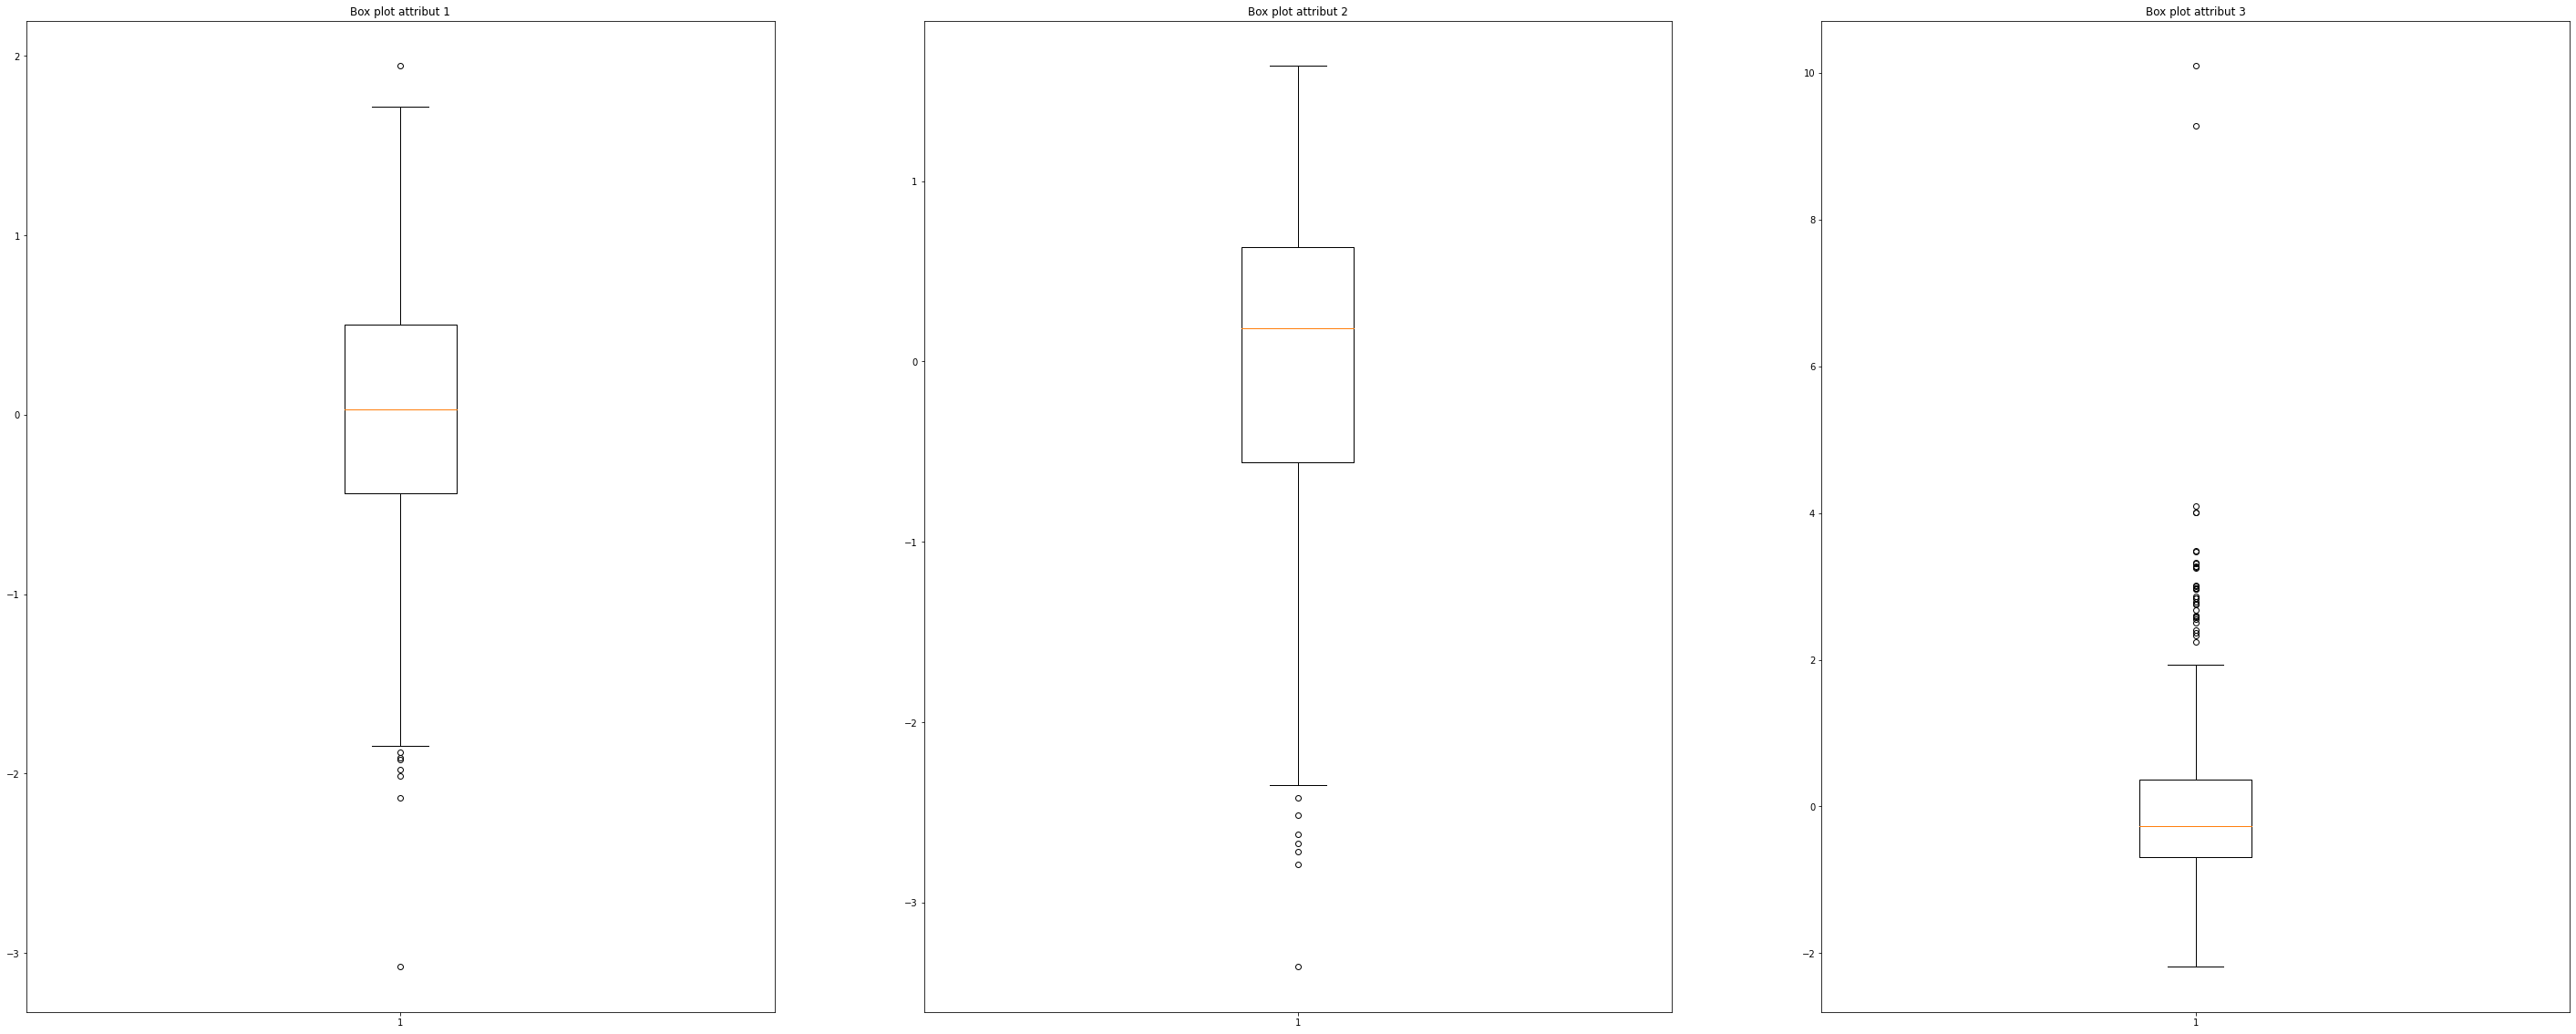

In [473]:
fig = plt.figure(figsize=(50,20))

for i in range(dTilde):
    ax = fig.add_subplot(1,dTilde,i+1)
    ax.set_title("Box plot attribut " + str(i+1))
    plt.boxplot(donnees_ACP[i])

# Question 5

In [475]:
data2 = np.concatenate((data[:,0:1],donnees_ACP.T),axis = 1).astype(float)
data2

array([[ 1.        , -0.0387609 , -1.10561623,  4.00184172],
       [ 1.        ,  0.7798776 , -0.6943468 ,  1.1695064 ],
       [ 1.        , -0.50561368, -0.84977059,  1.25713995],
       ...,
       [ 1.        ,  0.08443078, -0.81540134,  0.05759768],
       [ 1.        , -0.83010349, -2.67303936,  1.21128149],
       [ 0.        , -0.35293201,  0.79506177, -0.75898183]])

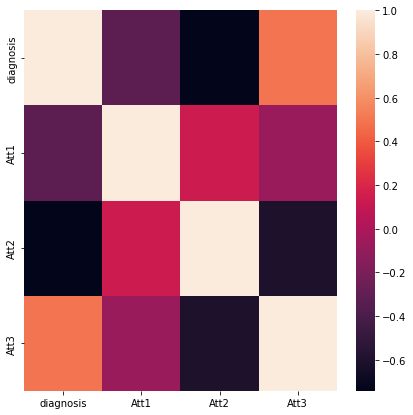

In [478]:
df2 = pd.DataFrame(data2, columns=['diagnosis','Att1','Att2','Att3'])

fig = plt.figure(figsize=(7,7))

seaborn.heatmap(df2.corr())

plt.show()

# Question 6

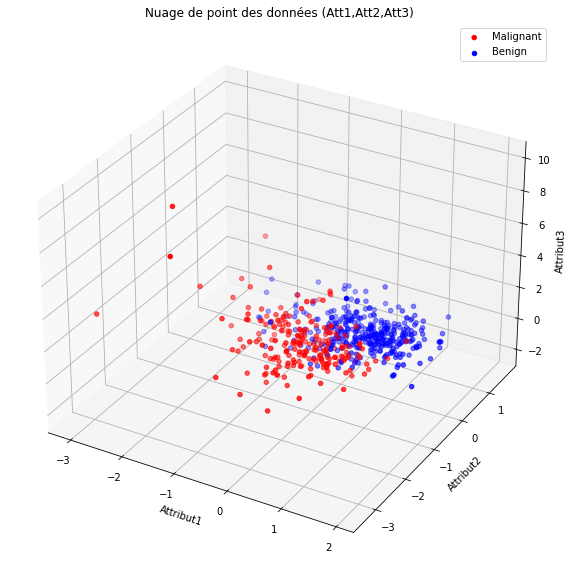

In [449]:
# On distingue la classe des points par la couleur : bleue pour B et rouge pour M

def trouve_col(a):
    if a == 1.:
        return 'red'
    else:
        return 'blue'

col_arr = np.vectorize(trouve_col)
c = col_arr(np.array(df['diagnosis']))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_title("Nuage de point des données (Att1,Att2,Att3)")
ax.scatter(df2['Att1'],df2['Att2'],df2['Att3'], color=c)
plt.xlabel("Attribut1")
plt.ylabel("Attribut2")
ax.set_zlabel("Attribut3")

# Appel supplémentaire de ax.scatter pour pouvoir créer une légende (le point d'indice n-1 a pour diagnosis "benign")
ax.scatter([data2[n-1,1]],[data2[n-1,2]],[data2[n-1,2]],color='b')
ax.legend(["Malignant","Benign"])

plt.show()


# Question 7

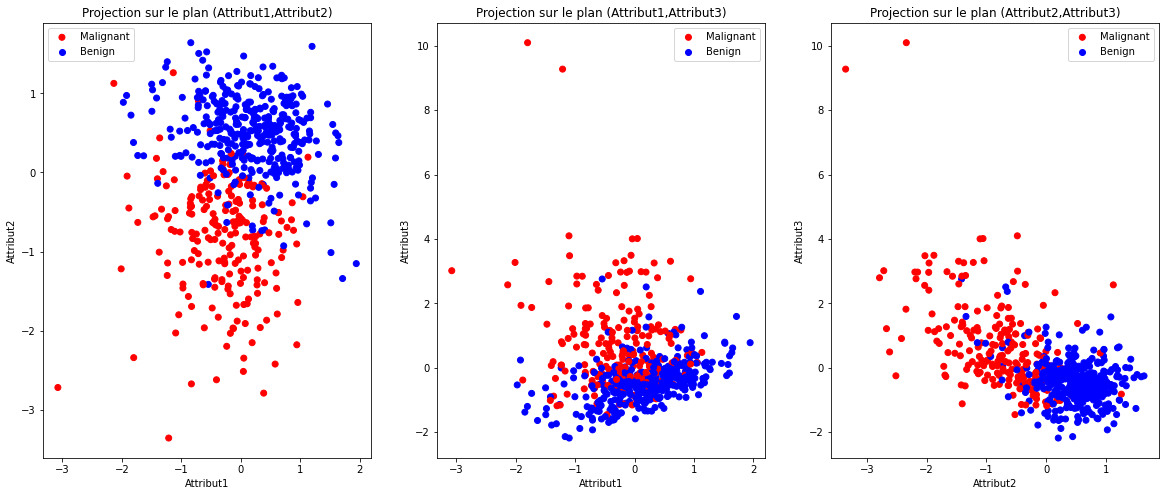

In [450]:
# Projection sur les 3 plans possibles

fig = plt.figure(figsize=(20,8))

ax = fig.add_subplot(1,dTilde,1)
ax.set_title("Projection sur le plan (Attribut1,Attribut2)")
plt.xlabel("Attribut1")
plt.ylabel("Attribut2")
ax.scatter(df2['Att1'],df2['Att2'], color=c)
ax.scatter([data2[n-1,1]],[data2[n-1,2]],color='b')
ax.legend(["Malignant","Benign"])


ax = fig.add_subplot(1,dTilde,2)
ax.set_title("Projection sur le plan (Attribut1,Attribut3)")
plt.xlabel("Attribut1")
plt.ylabel("Attribut3")
ax.scatter(df2['Att1'],df2['Att3'], color=c)
ax.scatter([data2[n-1,1]],[data2[n-1,3]],color='b')
ax.legend(["Malignant","Benign"])


ax = fig.add_subplot(1,dTilde,3)
ax.set_title("Projection sur le plan (Attribut2,Attribut3)")
plt.xlabel("Attribut2")
plt.ylabel("Attribut3")
ax.scatter(df2['Att2'],df2['Att3'], color=c)
ax.scatter([data2[n-1,1]],[data2[n-1,3]],color='b')
ax.legend(["Malignant","Benign"])

plt.show()


# Question 8

In [451]:
# Création et entraînement du modèle d'analyse linéaire discriminante
lda = LinearDiscriminantAnalysis()
X = data2[:,1:4]
y = data2[:,0]
lda.fit(X,y)

LinearDiscriminantAnalysis()

# Question 9

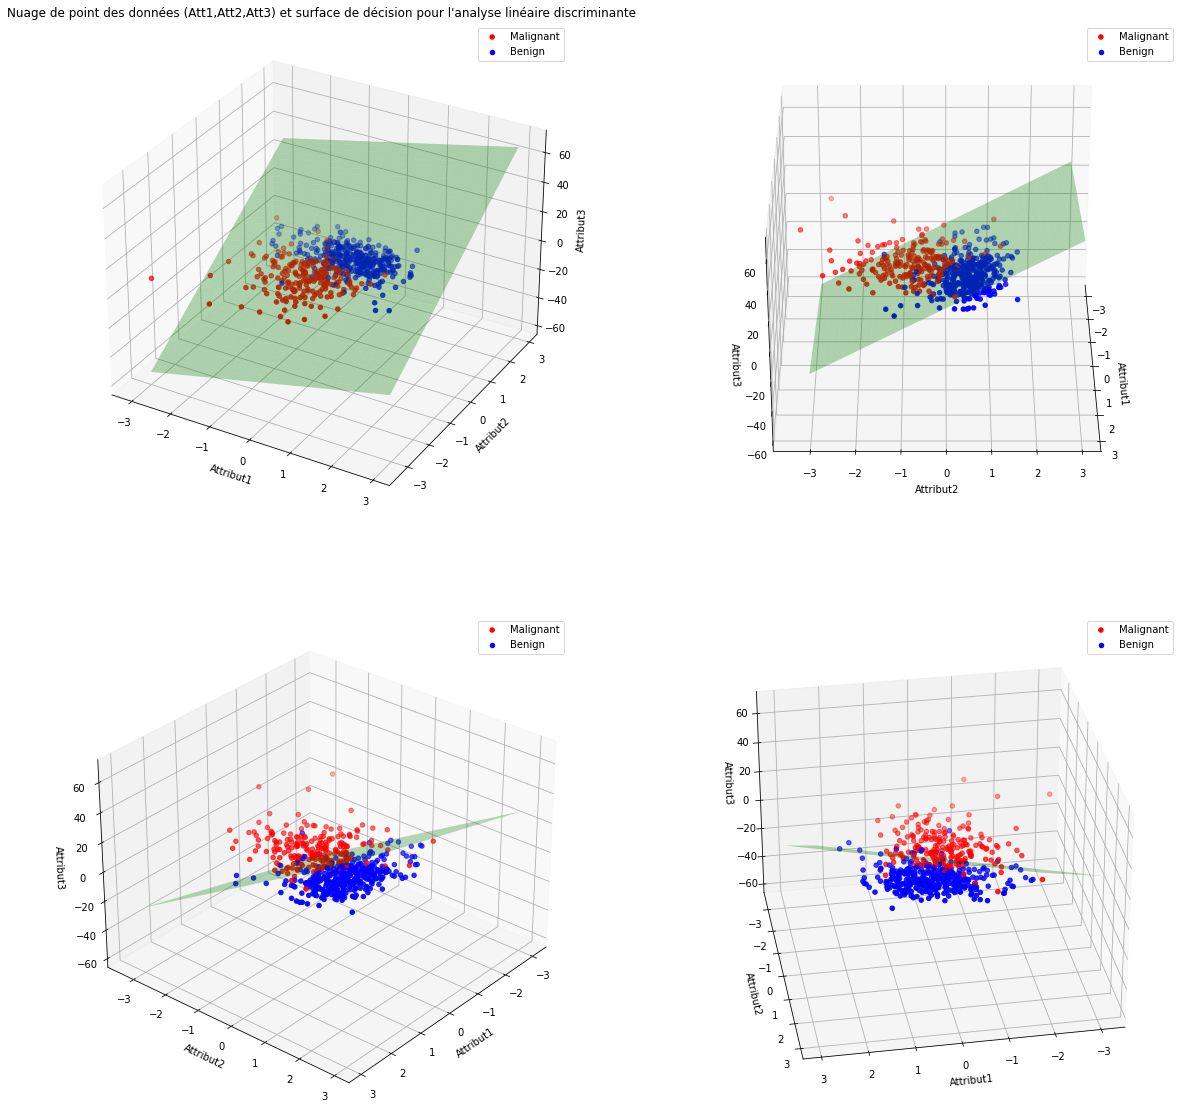

In [529]:
# Obtention des paramètres des surfaces de décision

b = lda.intercept_
w = lda.coef_

# Tracé 

def fun(U,V):
    """
    entrée : U,V dans R^2
    sortie : W tel que le point (U,V,W) appartient au plan d'équation wX + b = 0
    """
    return (-b[0] - w[0,0]*U - w[0,1]*V)/w[0,2]


xarange = yarange = np.arange(-3.0, 3.0, 0.05)
Xplan, Yplan = np.meshgrid(xarange, yarange)
q,r = Xplan.shape
Zplan = np.zeros_like(Xplan)


for i in range(q):
    for j in range(r):
        Zplan[i,j] = fun(Xplan[i,j],Yplan[i,j])


# On montre le nuage et le plan sous différents angles

fig = plt.figure(figsize=(20,20))


ax = fig.add_subplot(2,2,1,projection='3d')
ax.set_title("Nuage de point des données (Att1,Att2,Att3) et surface de décision pour l'analyse linéaire discriminante")
plt.xlabel("Attribut1")
plt.ylabel("Attribut2")
ax.set_zlabel("Attribut3")
scatter = ax.scatter(df2['Att1'],df2['Att2'],df2['Att3'], color=c)
ax.scatter([data2[n-1,1]],[data2[n-1,2]],[data2[n-1,2]],color='b')
ax.legend(["Malignant","Benign"])
ax.plot_surface(Xplan,Yplan,Zplan, color = 'green', alpha = 0.3)


ax = fig.add_subplot(2,2,2,projection='3d')
plt.xlabel("Attribut1")
plt.ylabel("Attribut2")
ax.set_zlabel("Attribut3")
scatter = ax.scatter(df2['Att1'],df2['Att2'],df2['Att3'], color=c)
ax.scatter([data2[n-1,1]],[data2[n-1,2]],[data2[n-1,2]],color='b')
ax.legend(["Malignant","Benign"])
ax.plot_surface(Xplan,Yplan,Zplan, color = 'green', alpha = 0.3)
ax.view_init(30,0)


ax = fig.add_subplot(2,2,3,projection='3d')
plt.xlabel("Attribut1")
plt.ylabel("Attribut2")
ax.set_zlabel("Attribut3")
scatter = ax.scatter(df2['Att1'],df2['Att2'],df2['Att3'], color=c)
ax.scatter([data2[n-1,1]],[data2[n-1,2]],[data2[n-1,2]],color='b')
ax.legend(["Malignant","Benign"])
ax.plot_surface(Xplan,Yplan,Zplan, color = 'green', alpha = 0.3)
ax.view_init(30,40)


ax = fig.add_subplot(2,2,4,projection='3d')
plt.xlabel("Attribut1")
plt.ylabel("Attribut2")
ax.set_zlabel("Attribut3")
scatter = ax.scatter(df2['Att1'],df2['Att2'],df2['Att3'], color=c)
ax.scatter([data2[n-1,1]],[data2[n-1,2]],[data2[n-1,2]],color='b')
ax.legend(["Malignant","Benign"])
ax.plot_surface(Xplan,Yplan,Zplan, color = 'green', alpha = 0.3)
ax.view_init(30,80)


plt.show()


# Question 10

In [453]:
# Création et entraînement du modèle d'analyse quadratique discriminante
qda = QuadraticDiscriminantAnalysis()
X = data2[:,1:4]
y = data2[:,0]
qda.fit(X,y)

<bound method QuadraticDiscriminantAnalysis.predict_proba of QuadraticDiscriminantAnalysis()>

# Question 11

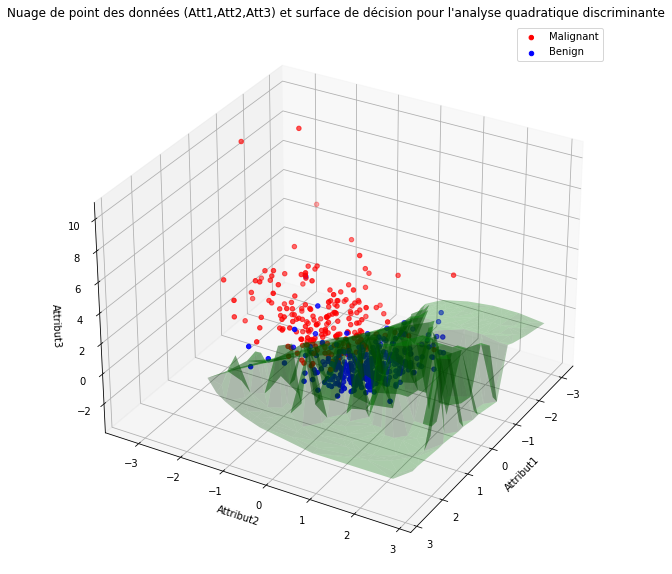

In [551]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_title("Nuage de point des données (Att1,Att2,Att3) et surface de décision pour l'analyse quadratique discriminante")
scatter = ax.scatter(df2['Att1'],df2['Att2'],df2['Att3'], color=c)
plt.xlabel("Attribut1")
plt.ylabel("Attribut2")
ax.set_zlabel("Attribut3")

ax.scatter([data2[n-1,1]],[data2[n-1,2]],[data2[n-1,2]],color='b')
ax.legend(["Malignant","Benign"])

# Pour afficher la surface de décision, nous utilisons qda.predict_proba qui donne la probabilité d'appartenance à la classe 1.0 du point donné en argument
# La surface de décision est l'ensemble des antécédants de 0.5 de qda.predict_proba

a = 0.2
eps = 0.05
xx = np.arange(-3.0,3.0,a)
yy = np.arange(-3.0,3.0,a)
zz = np.arange(-3.0,3.0,a)
nx = len(xx)
xx, yy, zz = np.meshgrid(xx,yy,zz)
points = np.array([[0,0,0]])

for i in range(nx):
    for j in range(nx):
        for k in range(nx):
            pnt = np.array([[xx[i,j,k],yy[i,j,k],zz[i,j,k]]])
            prob = qda.predict_proba(pnt)
            if prob[0,0]-0.5 < eps and prob[0,0]-0.5 > -eps:
                points = np.concatenate((points,pnt),axis = 0)


ax.plot_trisurf(points[:,0],points[:,1],points[:,2],color="green",alpha=0.3)
ax.view_init(30,30)


In [ ]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_title("Nuage de point des données (Att1,Att2,Att3) et surface de décision pour l'analyse quadratique discriminante")
scatter = ax.scatter(df2['Att1'],df2['Att2'],df2['Att3'], color=c)
plt.xlabel("Attribut1")
plt.ylabel("Attribut2")
ax.set_zlabel("Attribut3")

ax.scatter([data2[n-1,1]],[data2[n-1,2]],[data2[n-1,2]],color='b')
ax.legend(["Malignant","Benign"])

def fun(x,y):
    return lambda z: qda.predict_proba(np.array([[x,y,z]]))

a = 0.2
eps = 0.05
xx = np.arange(-3.0,3.0,a)
yy = np.arange(-3.0,3.0,a)
zz = 